In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NumPy recap
**NumPy array:** efficient data structure that contains **only one** data type.

In [2]:
x = [1, 2, 3]

print(np.array(x, dtype='int'))
print(np.array(x, dtype='float'))
print(np.array(x, dtype='str'))

[1 2 3]
[1. 2. 3.]
['1' '2' '3']


Useful to represent vector- or matrix-like objects. Very rarely used to store non-numeric data.

In [3]:
print(np.array(x, dtype=np.int32)) # Default integer.
print(np.array(x, dtype=np.float64)) # Deafault float.

[1 2 3]
[1. 2. 3.]


In [4]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

print(np.array([x, y, z]))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
# Indexing and slicing.
one_d = np.array(x)
two_d = np.array([x, y, z])

print(one_d[0])
print(one_d[:2])
print(two_d[2, 1])
print(two_d[1:, :])

1
[1 2]
8
[[4 5 6]
 [7 8 9]]


In [6]:
# Reshape.
# Resulting array must have the same size.
four_x_tree = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9],
                        [10,11,12]])
print(four_x_tree)

print(four_x_tree.reshape((3, 4)))
print(four_x_tree.reshape((6, 2)))
print(four_x_tree.reshape((1, 12)))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
[[ 1  2  3  4  5  6  7  8  9 10 11 12]]


# Pandas recap
**Pandas DataFrame:** matrix-like object made of **Pandas Series** as columns.

In [7]:
df = pd.DataFrame(four_x_tree, columns=['first', 'second', 'third'])
df

,first,second,third
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


A one-column DataFrame is not a Series!

In [8]:
print((df['first']))
df[['first']]

0     1
1     4
2     7
3    10
Name: first, dtype: int32


,first
0,1
1,4
2,7
3,10


In [9]:
# Column selection returns a Series.
s = df['first'] # We select with a column ID.
print(type(s))
print(s)

# Column slicing returns a DataFrame.
d2 = df[['first', 'second']] # We slice with a list of column IDs.
print(type(d2))
print(d2)

# Even if we slice a single column.
d1 = df[['first']] # Note the list
print(type(d1))
print(d1)

<class 'pandas.core.series.Series'>
0     1
1     4
2     7
3    10
Name: first, dtype: int32
<class 'pandas.core.frame.DataFrame'>
   first  second
0      1       2
1      4       5
2      7       8
3     10      11
<class 'pandas.core.frame.DataFrame'>
   first
0      1
1      4
2      7
3     10


In [10]:
# Same with loc.
print(type(df.loc[:, 'first']))
print(type(df.loc[:, ['first']]))

# And iloc.
print(type(df.iloc[:, 0]))
print(type(df.iloc[:, [0]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


# Loading remote datasets
Similar to _pd.read_csv_.

In [11]:
url = 'https://www.finance.yahoo.com/currencies' # Kudos to Alexei.
fx = pd.read_html(url)[0] # It is a list in case we pass a list of URLs.

fx

,Symbol,Name,Last Price,Change,% Change,52 Week Range,Day Chart
0,BTCUSD=X,BTC/USD,9254.5508,116.5576,+1.28%,NaN,NaN
1,ETHUSD=X,ETH/USD,231.6862,5.3712,+2.37%,NaN,NaN
2,EURUSD=X,EUR/USD,1.1259,0.0024,+0.21%,NaN,NaN
3,JPY=X,USD/JPY,107.4580,-0.4790,-0.44%,NaN,NaN
4,GBPUSD=X,GBP/USD,1.2487,0.0087,+0.70%,NaN,NaN
5,AUDUSD=X,AUD/USD,0.6922,0.0020,+0.29%,NaN,NaN
6,NZDUSD=X,NZD/USD,0.6484,0.0028,+0.43%,NaN,NaN
7,EURJPY=X,EUR/JPY,120.9530,-0.2630,-0.22%,NaN,NaN
8,GBPJPY=X,GBP/JPY,134.1750,0.3720,+0.28%,NaN,NaN
9,EURGBP=X,EUR/GBP,0.9014,-0.0042,-0.47%,NaN,NaN


### About the multi-axis _vs_ chain indexing thing.
The code looks similar, but there are essentially two different things.

In [12]:
print(fx.loc[0, 'Symbol']) # View. 2 "arguments" are passed to loc.
print(fx.loc[0]['Symbol']) # Copy. 1 "argument" is passed to loc. Then a new selection is made on the result.

BTCUSD=X
BTCUSD=X


In general, **explicit is better than implicit**. If you want to select rows and columns, use *.loc[]* or *.iloc[]*, if you want to create a copy, use the _.copy()_ method.

# Financial data examples
## Getting and exploring data

In [13]:
from pandas_datareader import data
import datetime as dt

start = '2020-01-01' # Also works with a specially formatted string.
end = dt.datetime.today()

ibm = data.DataReader('IBM', 'yahoo', start, end) # Thanks, Alexei!
ibm

C:\Users\PC\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,135.919998,134.770004,135.000000,135.419998,3148600.0,132.246933
2020-01-03,134.860001,133.559998,133.570007,134.339996,2373700.0,131.192245
2020-01-06,134.240005,133.199997,133.419998,134.100006,2425500.0,130.957886
2020-01-07,134.960007,133.399994,133.690002,134.190002,3090800.0,131.045761
2020-01-08,135.860001,133.919998,134.509995,135.309998,4346000.0,132.139526
...,...,...,...,...,...,...
2020-06-25,119.209999,116.099998,116.760002,119.029999,6130600.0,119.029999
2020-06-26,118.989998,116.260002,118.260002,117.190002,10750100.0,117.190002
2020-06-29,119.779999,117.370003,117.980003,119.750000,4159500.0,119.750000


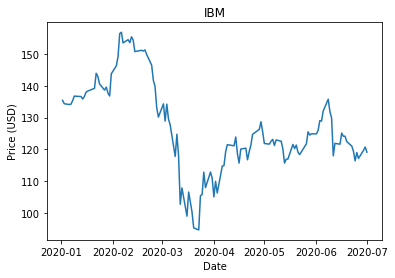

In [14]:
plt.plot(ibm['Close'])

plt.title('IBM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.show()

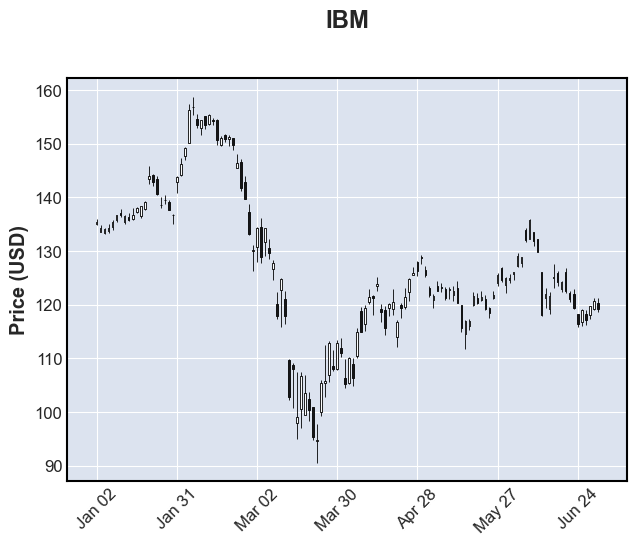

In [15]:
import mplfinance as mpf

mpf.plot(ibm, type='candle',
         title='IBM', ylabel='Price (USD)')

plt.show()

plt.style.use('default') # mplfinanced changed the default matplotlib style. =(

In [16]:
ibm_rdp = ibm.pct_change() * 100 # How much did the price move, as a percentage of last day's price.

# Equivalent to:
# (price_today - price_yesterday) / price_yesterday * 100

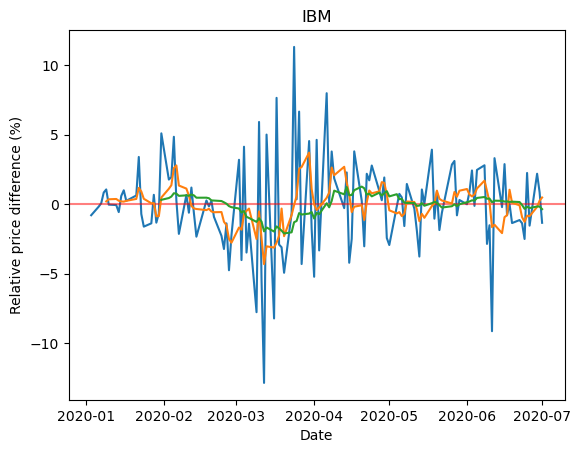

In [17]:
plt.plot(ibm_rdp['Close'])
plt.axhline(0, c='red', alpha=0.5)

ma5 = ibm_rdp['Close'].rolling(window=5).mean()
ma20 = ibm_rdp['Close'].rolling(window=20).mean()

plt.plot(ma5)
plt.plot(ma20)

plt.title('IBM')
plt.xlabel('Date')
plt.ylabel('Relative price difference (%)')

plt.show()

### Have a look at all Matplotlib styles in the [Style sheets reference](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html).

## Risk return analysis

In [18]:
start = '2015-07-01'
end = '2016-06-01'
solar = data.DataReader(['FSLR', 'TAN', 'GOGL'], 'yahoo', start, end)['Close']
solar

Symbols,FSLR,TAN,GOGL
Date,,,
2015-07-01,46.040001,38.840000,18.950001
2015-07-02,45.169998,38.549999,19.750000
2015-07-06,44.189999,36.369999,19.450001
2015-07-07,45.119999,36.099998,18.549999
2015-07-08,43.270000,33.669998,17.700001
...,...,...,...
2016-05-25,50.560001,22.090000,3.350000
2016-05-26,49.730000,21.969999,3.400000
2016-05-27,49.900002,21.959999,3.850000


In [19]:
def abline(intercept, slope):
    """Plot a line from intercept and slope"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='tab:orange')

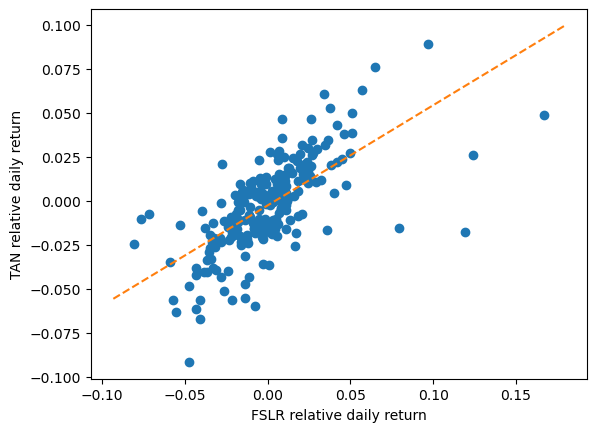

In [20]:
solar_rdp = solar.pct_change() # This is equivalent to the relative daily returns (relative to the previous day, that is).

plt.scatter(solar_rdp['FSLR'], solar_rdp['TAN'])

import statsmodels.api as sm
model = sm.OLS(solar_rdp['TAN'], sm.add_constant(solar_rdp['FSLR']), missing='drop').fit()
abline(model.params['const'], model.params['FSLR'])

plt.xlabel('FSLR relative daily return')
plt.ylabel('TAN relative daily return')

plt.show()

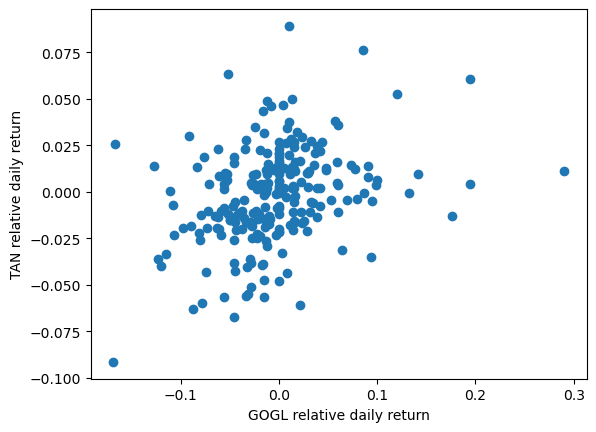

In [21]:
plt.scatter(solar_rdp['GOGL'], solar_rdp['TAN'])

plt.xlabel('GOGL relative daily return')
plt.ylabel('TAN relative daily return')

plt.show()

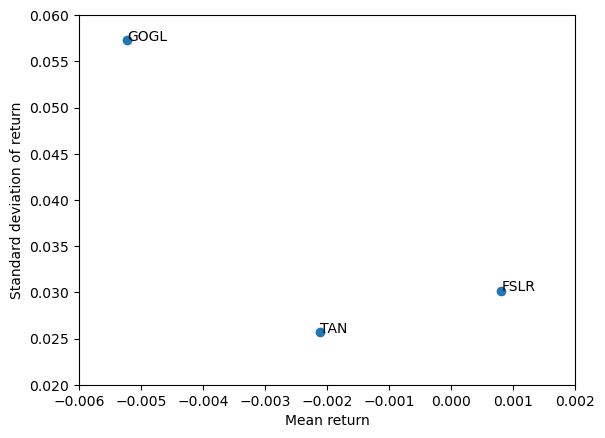

In [22]:
plt.scatter(solar_rdp.mean(), solar_rdp.std()) # Sort of a Sharpe ratio.

for symbol in ['FSLR', 'TAN', 'GOGL']:
    plt.annotate(symbol,
                 (solar_rdp.mean()[symbol],
                  solar_rdp.std()[symbol]))

plt.xlim((-0.006, 0.002))
plt.ylim((0.02, 0.06))
plt.xlabel('Mean return')
plt.ylabel('Standard deviation of return')

plt.show()